In [5]:
pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
# install required libraries
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt

In [8]:
fpath = glob("./data/female/*.jpg")  # female folder path
mpath = glob("./data/male/*.jpg")  #  male folder path

In [10]:
print("The number of images in Female  folder = ",len(fpath))
print("The number of images in Male  folder = ",len(mpath))

The number of images in Female  folder =  4762
The number of images in Male  folder =  5399


In [19]:
### Steps
haar = cv2.CascadeClassifier("./haarcascade/haarcascade_frontalface_default.xml")
    ### for female images
## step1 Read the image and convert into rgb
for i in range(len(fpath)):
    try:
        img = cv2.imread(fpath[i])
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        # step2 apply haarcascade classifier to the image
       
        gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
        faces_list = haar.detectMultiScale(gray,1.5,5)
        # print(faces_list)
        for x,y,w,h in faces_list:
            cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,255,0),2)
        
        ## step 3 crop the face from image
            crop_img = img[y:y+h,x:x+h]
        ## step 4 save the images into respective folder
            cv2.imwrite(f"./Crop_Data/Female/female{i}.jpg",crop_img)
            print("image succesfully processed")
    except:
        print("unable to preocess the image")
        


image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully pr

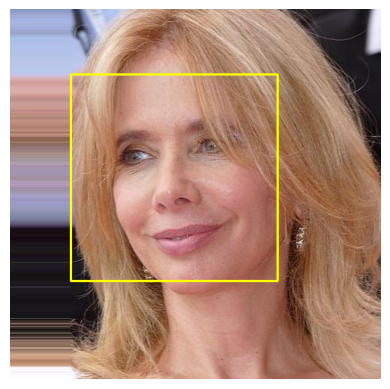

In [17]:
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

In [20]:
for i in range(len(mpath)):
    try:
        img = cv2.imread(mpath[i])
        img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        # step2 apply haarcascade classifier to the image
       
        gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
        faces_list = haar.detectMultiScale(gray,1.5,5)
        # print(faces_list)
        for x,y,w,h in faces_list:
            cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,255,0),2)
        
        ## step 3 crop the face from image
            crop_img = img[y:y+h,x:x+h]
        ## step 4 save the images into respective folder
            cv2.imwrite(f"./Crop_Data/male/male{i}.jpg",crop_img)
            print("image succesfully processed")
    except:
        print("unable to process the image")

image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully processed
image succesfully pr

### EDA Exploratory Data Analysis

 **Why EDA Here?**
 
 Here all the images having different dimensions, in order to understand the machine we have to set up a threshold dimension for all images. So we have to find the threshold dimension(width and height) for the images.
  1) Distributioin of male  and female images
  2) Distribution of size of all images
     Histogram, boxplot, split by gender
  3) Make the decision of width & height to resize using above chart
  4) Remove the few images that are having very less size 
   

In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
fpath  = glob("./Crop_Data/Female/*.jpg")
mpath  = glob("./Crop_Data/male/*.jpg")

In [5]:
df_female = pd.DataFrame(fpath,columns=["FilePath"])
df_female["Gender"] = "Female"

df_male = pd.DataFrame(mpath,columns=["FilePath"])
df_male["Gender"] = "Male"

df = pd.concat((df_female,df_male),axis=0)
df.shape

(4761, 2)

In [6]:
# apply size column
def getSize(path):
    img  = cv2.imread(path)
    return img.shape[0]

df["Dimension"] = df["FilePath"].apply(getSize)
df

,FilePath,Gender,Dimension
0,./Crop_Data/Female\female0.jpg,Female,273
1,./Crop_Data/Female\female1.jpg,Female,182
2,./Crop_Data/Female\female100.jpg,Female,122
3,./Crop_Data/Female\female1002.jpg,Female,122
4,./Crop_Data/Female\female1005.jpg,Female,182
...,...,...,...
2170,./Crop_Data/male\male994.jpg,Male,122
2171,./Crop_Data/male\male996.jpg,Male,54
2172,./Crop_Data/male\male997.jpg,Male,122
2173,./Crop_Data/male\male998.jpg,Male,81


In [7]:
# distribution by gender
gender_dist= df["Gender"].value_counts()
gender_dist

Gender
Female    2586
Male      2175
Name: count, dtype: int64

<Axes: ylabel='count'>

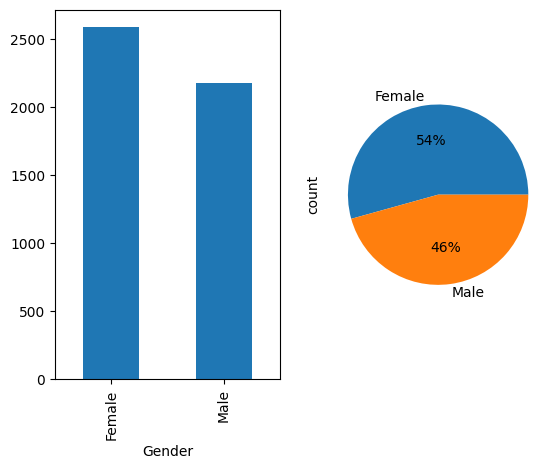

In [8]:
fig,ax  = plt.subplots(nrows=1,ncols=2)
gender_dist.plot(kind="bar",ax = ax[0])
gender_dist.plot(kind="pie",ax = ax[1],autopct="%0.0f%%")

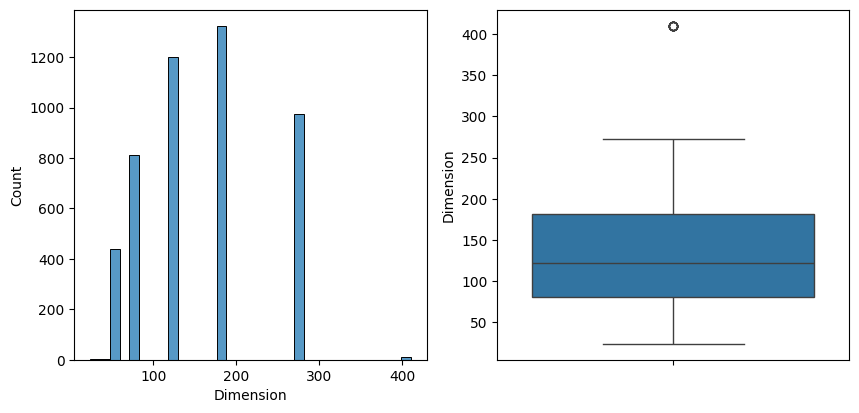

In [9]:
#distribution of size of images
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df["Dimension"])
plt.subplot(2,2,2)
sns.boxplot(df["Dimension"])
plt.show()

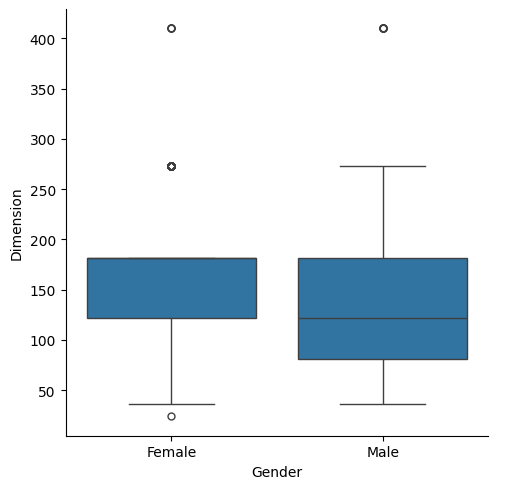

In [10]:
# split by gender
sns.catplot(data=df,x="Gender",y="Dimension",kind="box")

**Conclusions**
1. we have almost equal distribution of gender (numbers)
2. Most of the images are having dimension more than 60
3. Most of the female images are HD compare to male images.
4. In case of male images , 50 % are HD and 50% are low.
---
**Consider the image with dimension more than 60**


**Resize all the images into 100*100**  (in order to consider all the HD and Low quality images)

In [11]:
#filter out the images having size greater than 60
df_filter = df.query("Dimension>60")
df_filter.shape

(4315, 3)

In [12]:
df_filter["Gender"].value_counts(normalize=True)

Gender
Female    0.55226
Male      0.44774
Name: proportion, dtype: float64

In [13]:
# convert into structured data
def structuring(path):
    try:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        size = gray.shape[0]
        if size>=100:
            # shink
            gray_resize =  cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            #enlarge
            gray_resize =  cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
    
    
        flatten_image = gray_resize.flatten()
        return flatten_image
    except:
        return None
        

In [18]:
df_filter["data"] = df_filter["FilePath"].apply(structuring)

In [16]:
df_filter.head()

,FilePath,Gender,Dimension,data
0,./Crop_Data/Female\female0.jpg,Female,273,"[200, 189, 188, 181, 184, 185, 179, 176, 189, ..."
1,./Crop_Data/Female\female1.jpg,Female,182,"[31, 25, 35, 25, 31, 29, 30, 31, 34, 34, 49, 7..."
2,./Crop_Data/Female\female100.jpg,Female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./Crop_Data/Female\female1002.jpg,Female,122,"[137, 128, 114, 96, 96, 95, 93, 114, 150, 163,..."
4,./Crop_Data/Female\female1005.jpg,Female,182,"[234, 236, 231, 231, 231, 185, 142, 111, 52, 4..."


In [24]:
data = df_filter["data"].apply(pd.Series)
data.columns = [f"pixel_{i}" for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,200,189,188,181,184,185,179,176,189,180,...,109,106,108,111,113,115,120,117,118,122
1,31,25,35,25,31,29,30,31,34,34,...,45,27,22,30,22,35,20,35,65,19
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,137,128,114,96,96,95,93,114,150,163,...,66,53,68,67,74,92,97,103,102,96
4,234,236,231,231,231,185,142,111,52,45,...,241,240,236,237,239,237,237,242,241,241


In [25]:
# Data Normalization
data = data/255.0
data["Gender"] = df_filter["Gender"]

data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,Gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,Female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,Female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,Female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,Female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,Female


In [26]:
data.tail()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,Gender
2168,0.470588,0.372549,0.431373,0.329412,0.396078,0.600000,0.447059,0.568627,0.631373,0.643137,...,0.458824,0.486275,0.494118,0.509804,0.537255,0.537255,0.525490,0.482353,0.439216,Male
2170,0.062745,0.070588,0.066667,0.062745,0.066667,0.062745,0.054902,0.058824,0.062745,0.074510,...,0.898039,0.909804,0.913725,0.917647,0.921569,0.921569,0.917647,0.913725,0.909804,Male
2172,0.694118,0.701961,0.705882,0.709804,0.709804,0.713725,0.717647,0.717647,0.709804,0.705882,...,0.560784,0.552941,0.537255,0.545098,0.564706,0.592157,0.619608,0.650980,0.674510,Male
2173,0.145098,0.145098,0.145098,0.145098,0.149020,0.156863,0.156863,0.152941,0.152941,0.152941,...,0.160784,0.172549,0.188235,0.211765,0.239216,0.262745,0.278431,0.282353,0.278431,Male
2174,0.713725,0.717647,0.721569,0.721569,0.717647,0.725490,0.721569,0.721569,0.725490,0.721569,...,0.643137,0.682353,0.741176,0.745098,0.749020,0.745098,0.745098,0.745098,0.745098,Male


In [28]:
data.isna().sum().sum()

np.int64(0)

In [29]:
data.dropna(inplace=True)

In [30]:
# save the data
import pickle

In [31]:
pickle.dump(data,open("./Data/data_images.pickle",mode="wb"))